In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')


In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


<h1>data preprocessing

In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

<h1>text preprocessing

In [7]:
import re
import string

In [8]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

<h2>convert uppercase to lower case</h2>

In [9]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [10]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

<h2>remove links

In [11]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '',x, flags=re.MULTILINE) for x in x.split()))

In [12]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [13]:
import string

# Accessing the punctuation characters
print(string.punctuation)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


<h2>Remove punctuations

In [14]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuation)

In [15]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

<h2>Remove numbers</h2>

In [16]:
data["tweet"] = data['tweet'].str.replace('\d+','',regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24936\41874236.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["tweet"] = data['tweet'].str.replace('\d+','',regex=True)


In [17]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

<h2>remove stop words

In [18]:
!pip install nltk

In [19]:
import nltk

In [20]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [21]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [22]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(x for x in x.split() if x not in sw))

In [24]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

<h2>stemming

In [25]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()


In [26]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [27]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [28]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


<h1>Building vocabalary

In [29]:
from collections import Counter
vocab = Counter()

In [30]:
vocab

Counter()

In [31]:
Counter()

Counter()

In [32]:
for sentence in data['tweet']:
    vocab.update(sentence.split())
    

In [33]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [34]:
len(vocab)

15949

In [35]:
data.shape

(7920, 3)

In [36]:
tokens = [key for key in vocab if vocab[key]>10]
          

In [37]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [38]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w',encoding = "utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

<h2>Divide Dataset

In [72]:
X = data['tweet']
y = data['label']

In [73]:
!pip install scikit-learn

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [75]:
X_train


3054             june th wwdc steve job appl thisisawesom
6121    eat light light christma appl health graphicde...
3230    pickup line gener iphon app webapp fun onlinec...
3902    payback battl sandbox … андроид android game n...
3603    dont iphon stupid littl icon come box appleiss...
                              ...                        
1273    so pleas help crowd fund greec suicid iphon ga...
5891    swim time exercis penang georgetown practic ev...
6936       “paulinaradeka wow lost photo apple” shut fuck
4083    coffe cook mum thank make glutenfre appl chutn...
3061    happi birthday pop birthday rabbit banana appl...
Name: tweet, Length: 6336, dtype: object

In [44]:
X_train

20      appl art easter dear friend would like publish...
5669    shoot right bro phillipdorset gig mungojerri f...
6200    bad mood sinc lost phone love new phone iphon ...
7828    happi kiggi cat pet smile appl shotoniphon iph...
6044    bluetooth wont stop airpad suck theyr still cr...
                              ...                        
7239                      … guess start alreadi year late
9       photo fun selfi pool water soni camera picofth...
5672    fli alp much fun cool mission today stay tune ...
580     littl robin hatch easter monday use soni rxiii...
5135    beauti shop aliusaexpress iphon io app instant...
Name: tweet, Length: 6336, dtype: object

In [78]:
X_test

7258    ad kid hoodi collect product check … iphon cas...
6132    photo picoftheday iphon instagram hack jailbro...
6733    skinni mini vacat part erinohagainhair seenoev...
4922    pc exquisit squishi random charm iphon strap t...
6892    shouldnt leav alon perman marker lol sharpi ip...
                              ...                        
3639    moment like samsung live laugh life instamood ...
534     jump joy chihuahua dog puppi joy run soni port...
758     iphon app health fit htc one x samsung galaxi ...
7099    gusta ven phonetechnolog la venta power bank m...
5523    sweet billi sent bestfriend iphon case heart b...
Name: tweet, Length: 1584, dtype: object

In [79]:
y_train

3054    0
6121    0
3230    0
3902    0
3603    1
       ..
1273    0
5891    0
6936    1
4083    0
3061    0
Name: label, Length: 6336, dtype: int64

<h2>Vectorization

In [80]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [81]:
vectorized_x_train = vectorizer(X_train, tokens)

In [82]:
vectorized_x_test = vectorizer(X_test, tokens)

In [83]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [84]:
y_train

3054    0
6121    0
3230    0
3902    0
3603    1
       ..
1273    0
5891    0
6936    1
4083    0
3061    0
Name: label, Length: 6336, dtype: int64

In [51]:
vectorized_x_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [52]:
y_train

20      0
5669    0
6200    0
7828    0
6044    1
       ..
7239    1
9       0
5672    0
580     0
5135    0
Name: label, Length: 6336, dtype: int64

In [85]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [86]:
y_test

7258    0
6132    0
6733    0
4922    0
6892    0
       ..
3639    0
534     0
758     0
7099    0
5523    0
Name: label, Length: 1584, dtype: int64

In [87]:
y_train.value_counts()

label
0    4716
1    1620
Name: count, dtype: int64

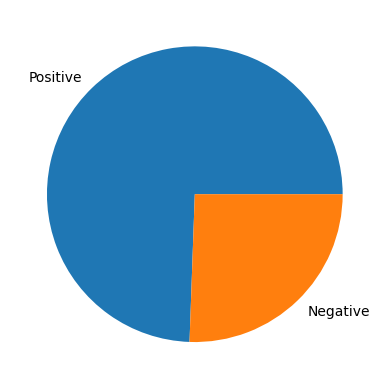

In [89]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()


<h2>handle imbalanceed dataset

In [90]:
!pip install imbalanced-learn

In [91]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9432, 1145) (9432,)


In [ ]:
vectorized_x_train = vectorizer(X_train, tokens)

In [92]:
y_train_smote.value_counts()

label
0    4716
1    4716
Name: count, dtype: int64

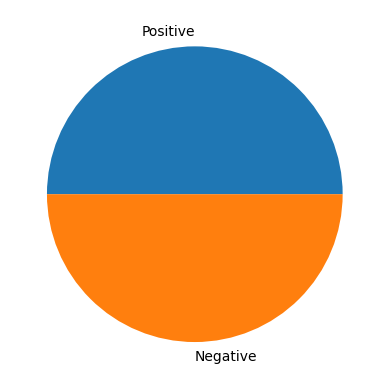

In [93]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [94]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [95]:
y_train_smote

0       0
1       0
2       0
3       0
4       1
       ..
9427    1
9428    1
9429    1
9430    1
9431    1
Name: label, Length: 9432, dtype: int64

In [96]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [97]:
y_test

7258    0
6132    0
6733    0
4922    0
6892    0
       ..
3639    0
534     0
758     0
7099    0
5523    0
Name: label, Length: 1584, dtype: int64

<h2>Model Training and EvaluatioN

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [102]:
from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_score(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

                

<h2>Logestic regression</h2>

In [120]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote )

y_train_pred = lr.predict(vectorized_x_train_smote)
y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_score(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.939
	Precision = 0.914
	Recall = 0.968
	F1-Score = 0.94
Testing Scores:
	Accuracy = 0.867
	Precision = 0.708
	Recall = 0.823
	F1-Score = 0.761


In [110]:
y_train_pred 

array([1, 0, 0, ..., 1, 1, 1])

In [111]:
y_train_smote

0       0
1       0
2       0
3       0
4       1
       ..
9427    1
9428    1
9429    1
9430    1
9431    1
Name: label, Length: 9432, dtype: int64

In [115]:
y_test_pred

array([0, 0, 1, ..., 0, 0, 0])

In [116]:
y_test

7258    0
6132    0
6733    0
4922    0
6892    0
       ..
3639    0
534     0
758     0
7099    0
5523    0
Name: label, Length: 1584, dtype: int64

<h1>Naive Bays

In [123]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote,y_train_smote )

y_train_pred = mnb.predict(vectorized_x_train_smote)
y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_score(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.905
	Precision = 0.868
	Recall = 0.956
	F1-Score = 0.909
Testing Scores:
	Accuracy = 0.863
	Precision = 0.671
	Recall = 0.914
	F1-Score = 0.774


<h2>Decition tree

In [124]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote,y_train_smote )

y_train_pred = dt.predict(vectorized_x_train_smote)
y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_score(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.826
	Precision = 0.668
	Recall = 0.638
	F1-Score = 0.652


<h2>Randomforest

In [125]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote,y_train_smote )

y_train_pred = rf.predict(vectorized_x_train_smote)
y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_score(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.871
	Precision = 0.77
	Recall = 0.709
	F1-Score = 0.738


<h2>Support Vector machine

In [127]:
svm = SVC()

svm.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)
y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_score(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.979
	Precision = 0.963
	Recall = 0.997
	F1-Score = 0.98
Testing Scores:
	Accuracy = 0.88
	Precision = 0.749
	Recall = 0.8
	F1-Score = 0.774


In [128]:
import pickle

with open('../static/model/model.pickle','wb') as file:
    pickle.dump(lr,file)
    